# Group Member 1's Working Notebook

## Description

Here's where I'd outline the goals of this specific notebook, and how they fit into the larger project goals

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from scipy.stats import ttest_1samp
from scipy import stats 
from scipy.stats import f_oneway
import seaborn as sns
import math

conn = sqlite3.connect('..\..\data\im.db')

## Section

Aggregated SQL query

Top 10 writers with highest mean_net_profit with num_movies greater than 5
Ordered by highest mean_net_profit descending

In [4]:
# More code!
writer_AGG = pd.read_sql("""
SELECT pe.primary_name as writer, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit, COUNT(pe.primary_name) as num_movies
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'writer'
GROUP BY pe.primary_name
HAVING num_movies > 5
ORDER BY mean_net_profit DESC
LIMIT 10
;
""", conn)
writer_AGG

writer  mean_net_profit  num_movies
0          Jack Kirby     6.235416e+08          13
1     Stephen McFeely     6.037486e+08           7
2  Christopher Markus     6.037486e+08           7
3            Stan Lee     5.967671e+08          16
4    Linda Woolverton     5.860717e+08           7
5          Rick Jaffa     4.822119e+08           6
6       Amanda Silver     4.822119e+08           6
7        Jeff Pinkner     3.706335e+08           6
8      Jonathan Aibel     2.590552e+08           6
9        Glenn Berger     2.590552e+08           6

We're using matplotlib to create a bar graph and visualize our sample population data for better insights

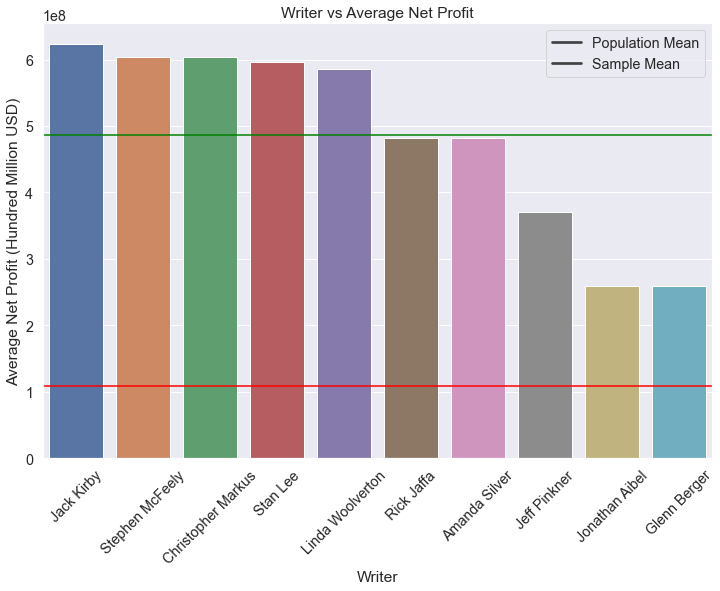

In [21]:
sns.set(rc={
    'figure.figsize':(12,8)
    })
sns.set(font_scale=1.3)
writer_plot = sns.barplot(data=writer_AGG, x='writer', y='mean_net_profit')
writer_plot.set(xlabel='Writer', ylabel='Average Net Profit (Hundred Million USD)', title= 'Writer vs Average Net Profit')
writer_plot.set_xticklabels(labels=writer_AGG.writer, rotation=45);
writer_plot.axhline(y=population_mean, color='red', label='Population Mean')
writer_plot.axhline(y=writer_AGG.mean_net_profit.mean(), color='green', label='Sample Mean')
writer_plot.legend(['Population Mean', 'Sample Mean'])
plt.show()

Disaggregated SQL query 2 categories

Writer
net_profit

In [22]:
writer = pd.read_sql("""
SELECT pe.primary_name as writer, (mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'writer'
;
""", conn)
writer

writer  net_profit
0         Madhan Karky     -700000
1        Sean Macaulay    22060480
2         Simon Kelton    22060480
3      Leonard Hartman   -26762748
4       Deborah Kaplan    13618920
...                ...         ...
4349    Emil B. Garuba     -625000
4350   Mariam Nwaringa     -625000
4351  Chijioke Ononiwu     -625000
4352    Farzaneh Fathi   -30147513
4353     Reza Shirvani   -30147513

[4354 rows x 2 columns]

Our goal is to gain a deeper understanding of the statistics underlying our sample population, with a particular focus on identifying any significant differences between two groups, namely the writers and mean net profits. We aim to test our hypothesis that writers make a significantly higher net profit than the population mean, while rejecting the null hypothesis that they do not.

Hypothesis: (writer) makes significantly more net profit than our population mean.

Null Hypothesis: (writer) does not make significantly more net profit than our population mean.

In [26]:
population_mean = writer['net_profit'].mean()
t_test = ttest_1samp(writer_AGG['mean_net_profit'], population_mean)

print("population mean of mean net profit:", population_mean)
print("t-test statistic:", t_test)

population mean of mean net profit: 107977945.73840147
t-test statistic: Ttest_1sampResult(statistic=8.347228087762815, pvalue=1.573882281540297e-05)


The t-test statistic of 8.347 indicates that the difference between the sample mean of mean net profit (486704518.06) and the population mean of mean net profit (107977945.74) is statistically significant. The p-value of 1.573882281540297e-05, which is less than the commonly used significance level of 0.05, also supports this conclusion.

Therefore, we can reject the null hypothesis and conclude that the top 10 writers do make significantly more net profit than the population mean. However, it is important to note that this conclusion is based on the specific sample and population studied and may not be generalizable to other populations or contexts. Further research and analysis may be necessary to confirm and extend this finding.